In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(1981)

n_samples = 30
degrees = [1, 15, 3, 5]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples)*0.1

print(X)
print(y)

[0.02385472 0.0689     0.11451939 0.13233723 0.20414244 0.21388575
 0.25024219 0.26865344 0.28499548 0.31432598 0.36140032 0.38409571
 0.40513121 0.40721321 0.55448686 0.60550542 0.60892626 0.62338562
 0.65986813 0.67518306 0.72107481 0.73214605 0.78411895 0.86101857
 0.88559097 0.88654022 0.9262294  0.93152379 0.94146993 0.97341551]
[ 1.06325417  0.94955282  0.95689539  0.8040319   0.52384314  0.64719834
  0.49755715  0.31460681  0.05479708  0.15530579 -0.10798829 -0.12430512
 -0.30175409 -0.46843211 -0.86350937 -0.88203305 -0.97826894 -0.88081571
 -1.06542333 -1.12229818 -0.9667984  -0.98205911 -0.78163116 -0.4310119
 -0.47200009 -0.43398333 -0.27498994 -0.23807591 -0.33166318 -0.2000986 ]


# $y = cos(1.5 \pi x)$

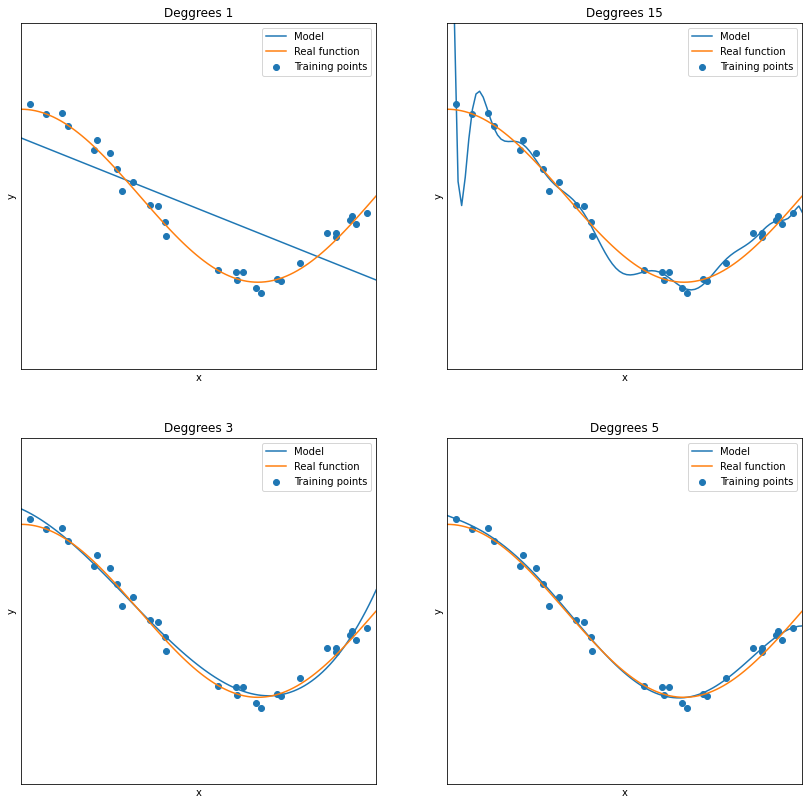

In [7]:
plt.figure(figsize=(14, 14))

X_test = np.linspace(0, 1, 100)

for i, degree in enumerate(degrees):
    ax = plt.subplot(2, 2, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="Real function")
    plt.scatter(X, y, label="Training points")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Deggrees {degree}")

plt.show()